Time 0.5 -> Kappa: 0.1250
Time 0.5 -> Rate:  0.8571


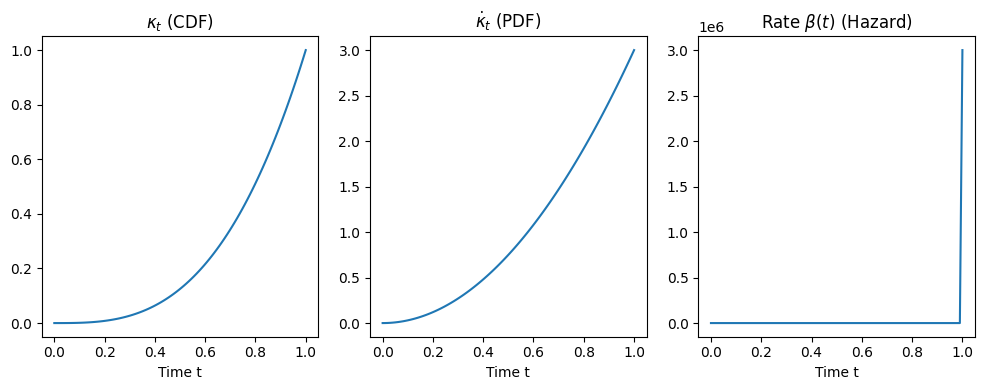

In [1]:
import torch
import torch.nn as nn
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

from chemflow.flow_matching.schedules import (
    BetaSchedule,
    FastPowerSchedule,
    CubicSchedule,
)


# --- Usage ---
if __name__ == "__main__":
    # Create schedule
    schedule = CubicSchedule()

    # Create time steps (works on GPU if needed)
    t = torch.linspace(0, 1, 100)

    # 3. Compute values
    k = schedule.kappa_t(t)
    k_dot = schedule.kappa_t_dot(t)
    r = schedule.rate(t)

    print(f"Time 0.5 -> Kappa: {schedule.kappa_t(torch.tensor(0.5)):.4f}")
    print(f"Time 0.5 -> Rate:  {schedule.rate(torch.tensor(0.5)):.4f}")

    # Visualizing (Optional)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.plot(t, k)
    plt.title(r"$\kappa_t$ (CDF)")
    plt.xlabel("Time t")

    plt.subplot(1, 3, 2)
    plt.plot(t, k_dot)
    plt.title(r"$\dot{\kappa}_t$ (PDF)")
    plt.xlabel("Time t")

    plt.subplot(1, 3, 3)
    plt.plot(t, r)
    plt.title(r"Rate $\beta(t)$ (Hazard)")
    plt.xlabel("Time t")

    plt.tight_layout()
    plt.show()
